# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, **all** three pieces of data are gathered for this project and loaded in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import io
import json
import re
from timeit import default_timer as timer
from bs4 import BeautifulSoup
%matplotlib inline

print(tweepy.__version__) # Use this version to determine the version of the API to be used

3.5.0


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
urlData = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content
rawData = pd.read_csv(io.StringIO(urlData.decode('utf-8')),sep='\t')

3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
consumer_key = "d4PigJpPkzW0eU1sGTMyWozIq" #Enter your consumer key
consumer_secret = "0CrVab4QFsVOrNFbgqhYvpFcpzZReQPsKSulNdaGun11KtIwfA" #Enter your consumer secret
access_token = "480513604-k1k8SBlSGJZSdF54BOFzcYuo4eq5EXrKDGLPnz2j" #Enter your access token
access_token_secret = "qQGlyjyC5bIObNAUsIbBRDFJhKhF8Q8lnHZ2PMsCuxnny" #Enter your access token secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [4]:
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in rawData.tweet_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 666020888022790149
Success
2: 666029285002620928
Success
3: 666033412701032449
Success
4: 666044226329800704
Success
5: 666049248165822465
Success
6: 666050758794694657
Success
7: 666051853826850816
Success
8: 666055525042405380
Success
9: 666057090499244032
Success
10: 666058600524156928
Success
11: 666063827256086533
Success
12: 666071193221509120
Success
13: 666073100786774016
Success
14: 666082916733198337
Success
15: 666094000022159362
Success
16: 666099513787052032
Success
17: 666102155909144576
Success
18: 666104133288665088
Success
19: 666268910803644416
Success
20: 666273097616637952
Success
21: 666287406224695296
Success
22: 666293911632134144
Success
23: 666337882303524864
Success
24: 666345417576210432
Success
25: 666353288456101888
Success
26: 666362758909284353
Success
27: 666373753744588802
Success
28: 666396247373291520
Success
29: 666407126856765440
Success
30: 666411507551481857
Success
31: 666418789513326592
Success
32: 666421158376562688
Success
33: 6664282763494

Success
262: 670786190031921152
Success
263: 670789397210615808
Success
264: 670792680469889025
Success
265: 670797304698376195
Success
266: 670803562457407488
Success
267: 670804601705242624
Success
268: 670807719151067136
Success
269: 670811965569282048
Success
270: 670815497391357952
Success
271: 670822709593571328
Success
272: 670823764196741120
Success
273: 670826280409919488
Success
274: 670832455012716544
Success
275: 670833812859932673
Success
276: 670838202509447168
Success
277: 670840546554966016
Success
278: 670842764863651840
Success
279: 670995969505435648
Success
280: 671109016219725825
Success
281: 671115716440031232
Success
282: 671122204919246848
Success
283: 671134062904504320
Success
284: 671138694582165504
Success
285: 671141549288370177
Success
286: 671147085991960577
Success
287: 671151324042559489
Success
288: 671154572044468225
Success
289: 671159727754231808
Success
290: 671163268581498880
Success
291: 671166507850801152
Success
292: 671182547775299584
Success


Success
519: 676470639084101634
Success
520: 676496375194980353
Success
521: 676533798876651520
Success
522: 676575501977128964
Success
523: 676582956622721024
Success
524: 676588346097852417
Success
525: 676603393314578432
Success
526: 676606785097199616
Success
527: 676613908052996102
Success
528: 676617503762681856
Success
529: 676776431406465024
Success
530: 676811746707918848
Success
531: 676819651066732545
Success
532: 676821958043033607
Success
533: 676864501615042560
Success
534: 676897532954456065
Success
535: 676936541936185344
Success
536: 676942428000112642
Success
537: 676946864479084545
Success
538: 676948236477857792
Success
539: 676949632774234114
Success
540: 676957860086095872
Success
541: 676975532580409345
Success
542: 677187300187611136
Success
543: 677228873407442944
Success
544: 677269281705472000
Success
545: 677301033169788928
Success
546: 677314812125323265
Success
547: 677328882937298944
Success
548: 677331501395156992
Success
549: 677334615166730240
Success


Success
776: 689659372465688576
Success
777: 689661964914655233
Success
778: 689835978131935233
Success
779: 689877686181715968
Success
780: 689905486972461056
Success
781: 689977555533848577
Success
782: 689999384604450816
Success
783: 690005060500217858
Success
784: 690015576308211712
Success
785: 690021994562220032
Success
786: 690248561355657216
Success
787: 690360449368465409
Success
788: 690374419777196032
Success
789: 690400367696297985
Success
790: 690597161306841088
Success
791: 690649993829576704
Success
792: 690690673629138944
Success
793: 690728923253055490
Success
794: 690735892932222976
Success
795: 690932576555528194
Success
796: 690938899477221376
Success
797: 690959652130045952
Rate limit reached. Sleeping for: 708
Success
798: 691090071332753408
Success
799: 691096613310316544
Success
800: 691321916024623104
Success
801: 691416866452082688
Success
802: 691444869282295808
Success
803: 691459709405118465
Success
804: 691483041324204033
Success
805: 691675652215414786
Su

Success
1031: 711306686208872448
Success
1032: 711363825979756544
Success
1033: 711652651650457602
Success
1034: 711694788429553666
Success
1035: 711732680602345472
Success
1036: 711743778164514816
Success
1037: 711968124745228288
Success
1038: 711998809858043904
Success
1039: 712065007010385924
Success
1040: 712085617388212225
Success
1041: 712092745624633345
Success
1042: 712097430750289920
Success
1043: 712438159032893441
Success
1044: 712668654853337088
Success
1045: 712717840512598017
Success
1046: 712809025985978368
Success
1047: 713175907180089344
Success
1048: 713177543487135744
Success
1049: 713411074226274305
Success
1050: 713761197720473600
Success
1051: 713900603437621249
Success
1052: 713919462244790272
Success
1053: 714141408463036416
Success
1054: 714214115368108032
Success
1055: 714251586676113411
Success
1056: 714258258790387713
Success
1057: 714606013974974464
Success
1058: 714631576617938945
Success
1059: 714957620017307648
Success
1060: 714982300363173890
Success
10

Success
1280: 750117059602808832
Success
1281: 750132105863102464
Success
1282: 750147208377409536
Success
1283: 750383411068534784
Success
1284: 750429297815552001
Success
1285: 750506206503038976
Success
1286: 750719632563142656
Success
1287: 750868782890057730
Success
1288: 751132876104687617
Success
1289: 751205363882532864
Success
1290: 751251247299190784
Success
1291: 751456908746354688
Success
1292: 751538714308972544
Success
1293: 751583847268179968
Success
1294: 751598357617971201
Success
1295: 751830394383790080
Success
1296: 751937170840121344
Success
1297: 752173152931807232
Success
1298: 752309394570878976
Success
1299: 752334515931054080
Success
1300: 752519690950500352
Success
1301: 752660715232722944
Success
1302: 752682090207055872
Success
1303: 752917284578922496
Success
1304: 753026973505581056
Success
1305: 753294487569522689
Success
1306: 753375668877008896
Success
1307: 753398408988139520
Success
1308: 753420520834629632
Success
1309: 753655901052166144
Success
13

Success
1530: 789268448748703744
Success
1531: 789530877013393408
Success
1532: 789599242079838210
Success
1533: 789628658055020548
Success
1534: 789986466051088384
Success
1535: 790277117346975746
Success
1536: 790337589677002753
Success
1537: 790581949425475584
Success
1538: 790698755171364864
Success
1539: 790723298204217344
Success
1540: 790946055508652032
Success
1541: 790987426131050500
Success
1542: 791026214425268224
Success
1543: 791312159183634433
Success
1544: 791406955684368384
Success
1545: 791672322847637504
Success
1546: 792050063153438720
Success
1547: 792394556390137856
Success
1548: 792773781206999040
Success
1549: 792883833364439040
Success
1550: 792913359805018113
Success
1551: 793120401413079041
Success
1552: 793135492858580992
Success
1553: 793150605191548928
Success
1554: 793165685325201412
Success
1555: 793180763617361921
Success
1556: 793195938047070209
Success
1557: 793210959003287553
Success
1558: 793226087023144960
Success
1559: 793241302385262592
Success
15

Success
1778: 828381636999917570
Success
1779: 828408677031882754
Success
1780: 828409743546925057
Success
1781: 828650029636317184
Success
1782: 828708714936930305
Success
1783: 828770345708580865
Success
1784: 829011960981237760
Success
1785: 829141528400556032
Success
1786: 829374341691346946
Fail
1787: 829449946868879360
Success
1788: 829501995190984704
Success
1789: 829861396166877184
Success
1790: 829878982036299777
Success
1791: 830097400375152640
Success
1792: 830583320585068544
Success
1793: 830956169170665475
Success
1794: 831262627380748289
Success
1795: 831309418084069378
Success
1796: 831315979191906304
Success
1797: 831322785565769729
Success
1798: 831552930092285952
Success
1799: 831650051525054464
Success
1800: 831670449226514432
Success
1801: 831911600680497154
Success
1802: 831939777352105988
Success
1803: 832032802820481025
Success
1804: 832040443403784192
Success
1805: 832215726631055365
Success
1806: 832273440279240704
Success
1807: 832369877331693569
Success
1808:

Success
2028: 882268110199369728
Success
2029: 882627270321602560
Success
2030: 882762694511734784
Success
2031: 882992080364220416
Success
2032: 883117836046086144
Success
2033: 883360690899218434
Success
2034: 883482846933004288
Success
2035: 883838122936631299
Success
2036: 884162670584377345
Success
2037: 884441805382717440
Success
2038: 884562892145688576
Success
2039: 884876753390489601
Success
2040: 884925521741709313
Success
2041: 885167619883638784
Success
2042: 885311592912609280
Success
2043: 885528943205470208
Success
2044: 885984800019947520
Success
2045: 886258384151887873
Success
2046: 886366144734445568
Success
2047: 886680336477933568
Success
2048: 886736880519319552
Success
2049: 886983233522544640
Success
2050: 887101392804085760
Success
2051: 887343217045368832
Success
2052: 887473957103951883
Success
2053: 887517139158093824
Success
2054: 887705289381826560
Success
2055: 888078434458587136
Success
2056: 888202515573088257
Fail
2057: 888554962724278272
Success
2058:

In [5]:
tweet_data = [json.loads(line) for line in open('tweet_json.txt', 'r')]

In [6]:
# Big s/o to https://datatofish.com/dictionary-to-dataframe/
tweet_data_df=pd.DataFrame(tweet_data,columns = ['id','retweet_count','favorite_count'])    

## Assessing Data
In this section, at least **eight (8) quality issues and two (2) tidiness issue** are detected and documented. **Both** visual assessment and programmatic assessement are used to assess the data.

**Note:** pay attention to the following key points when you access the data.

* Only original tweet ratings (no retweets) that have images are required. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Twitter API Data

In [7]:
tweet_data_df.head()

,id,retweet_count,favorite_count
0,666020888022790149,419,2279
1,666029285002620928,39,112
2,666033412701032449,36,100
3,666044226329800704,114,246
4,666049248165822465,36,88


In [8]:
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 3 columns):
id                2057 non-null int64
retweet_count     2057 non-null int64
favorite_count    2057 non-null int64
dtypes: int64(3)
memory usage: 48.3 KB


### Image Predictions

In [9]:
rawData.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
rawData.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Twitter Archive

In [12]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [13]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality issues

1. `timestamp` and `retweeted_status_timestamp` are wrong data type

2. Data in `in_reply_to_status_id`, `in_reply_to_user_id` and `tweet_id` are wrong data type 

2. `Source` is in HTML format

3. `puppo`, `doggo`, `floofer`, `pupper`,  variables are wrong type

5. `rating_denominator` entry has a 0 value

6. Occasional inclusion of articles and non-name entries in `name` column

7. `text` column contains tweet url

8. `img_num` in rawData is wrong data type

### Tidiness issues

1. `Source` contains more than one variable of information

2. `puppo`, `doggo`, `floofer`, `pupper`,  columns cause table to be too wide

## Cleaning Data
In this section, a cleaning of **all** of the issues documented while assessing was done 

**Note:** A copy of the original data is made before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [15]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
rawData_clean = rawData.copy()
tweet_data_clean = tweet_data_df.copy()

### Issue #1: timestamp and retweeted_status_timestamp are wrong data type

#### Define:

1. Change `timestamp` and `retweeted_status_timestamp` to datetime

#### Code

In [16]:
twitter_archive_clean.timestamp=pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp=pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

#### Test

In [17]:
twitter_archive_clean.timestamp.dtype

dtype('<M8[ns]')

In [18]:
twitter_archive_clean.retweeted_status_timestamp.dtype

dtype('<M8[ns]')

### Issue #2: Data in `in_reply_to_status_id`, `in_reply_to_user_id` and `tweet_id` are wrong data type 

#### Define

1. Change `in_reply_to_user_id`, `in_reply_to_status_id` and `tweet_id` to str

#### Code

In [19]:
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.fillna(0).astype(str)
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.fillna(0).astype(str)
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

#### Test

In [20]:
twitter_archive_clean.in_reply_to_user_id.dtype

dtype('O')

In [21]:
twitter_archive_clean.in_reply_to_status_id.dtype

dtype('O')

In [22]:
twitter_archive_clean.tweet_id.dtype

dtype('O')

### Quality Issue #3: `Source` is in HTML format

### Tidiness Issue #1: `Source` contains more than one variable

#### Define: Extract body of HTML text and store primary sources and their relative sites in different columns

Looking at this column, there are 4 primary sources with their relative sites. Keeping the link source and media source would be particularly insightful

Rearranging the columns needed a specific [function](https://towardsdatascience.com/reordering-pandas-dataframe-columns-thumbs-down-on-standard-solutions-1ff0bc2941d5)

In [23]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Code

In [24]:
link_source_list= []
media_source_list= []

for source in twitter_archive_clean.source:

    soup = BeautifulSoup(source, "html.parser")

    for link in soup.findAll('a'):
        link_source_list.append(link.get('href'))
        media_source_list.append(soup.a.text)

twitter_archive_clean['link_source'] = pd.Series(link_source_list)
twitter_archive_clean['media_source'] = pd.Series(media_source_list)

# This function is for mainly moving columns relative to a specific column.

def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

twitter_archive_clean=movecol(twitter_archive_clean,['link_source','media_source'],'timestamp')
twitter_archive_clean.drop('source',axis=1,inplace=True)

#### Test

In [25]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,link_source,media_source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,http://twitter.com/download/iphone,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,http://twitter.com/download/iphone,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,http://twitter.com/download/iphone,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,http://twitter.com/download/iphone,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,http://twitter.com/download/iphone,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tidiness Issue #2: `puppo`, `doggo`, `floofer`, `pupper`,  columns cause table to be too wide

#### Define:

Melt dataframe to one column containing all dog categories

#### Code

In [26]:
id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'link_source', 'media_source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name']

twitter_archive_clean_melt = pd.melt(twitter_archive_clean, id_vars=id_vars,
                           var_name='dog_category', value_name='dog_type')

twitter_archive_clean_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 16 columns):
tweet_id                      9424 non-null object
in_reply_to_status_id         9424 non-null object
in_reply_to_user_id           9424 non-null object
timestamp                     9424 non-null datetime64[ns]
link_source                   9424 non-null object
media_source                  9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null datetime64[ns]
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
dog_category                  9424 non-null object
dog_type                      9424 non-null object
dtypes: datetime64[ns](2), float64(2), int64(2), object(10)
memo

In [27]:
# Melting the dataframe so that we can have the dog category for each entry in one column

# Creating a dataframe of all values not labeled 'None'
twitter_archive_clean_melt_NN = twitter_archive_clean_melt[twitter_archive_clean_melt.dog_type!='None']

# Drop the dog_category column which is the variable name
twitter_archive_clean_melt_NN = twitter_archive_clean_melt_NN.drop('dog_category', axis=1)

# Creating a dataframe of all values labeled 'None'
twitter_archive_clean_melt_None = twitter_archive_clean_melt[twitter_archive_clean_melt.dog_type=='None']

# Drop the dog_category column which is the variable name
twitter_archive_clean_melt_None = twitter_archive_clean_melt_None.drop('dog_category', axis=1)

# Checking if all entries in the None dataframe are not in the 'valued' dataframe 
twitter_archive_clean_melt_None=twitter_archive_clean_melt_None[~twitter_archive_clean_melt_None.tweet_id.isin(twitter_archive_clean_melt_NN.tweet_id)]
twitter_archive_clean_melt_concat = pd.concat([twitter_archive_clean_melt_NN,twitter_archive_clean_melt_None])
twitter_archive_clean_melt_concat.drop_duplicates('tweet_id',inplace=True)

In [28]:
twitter_archive_clean = twitter_archive_clean_melt_concat

#### Test

In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 9 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
link_source                   2356 non-null object
media_source                  2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_type                      2356 non-null object
dtypes: datetime64[ns](2), float64(2), int64(2), object(9)
memory usage: 294.5+ KB


### Quality Issue #4: `dog-type` variables are wrong type

#### Define

Change `dog_type` variables to categorical

#### Code

In [30]:
twitter_archive_clean.dog_type=twitter_archive_clean.dog_type.astype('category')

#### Test

In [31]:
twitter_archive_clean.dog_type.dtype

CategoricalDtype(categories=['None', 'doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

### Quality Issue #5: `rating_denominator` entry has a 0 value

#### Define

The 0 denominator entry seems to be erroneous. We're going to drop it from the dataset. Mathematically, a division by 0 is undefined. Additionally, there is no extra information from the text indicating a possible rating of the dog

#### Code

In [32]:
error_index=twitter_archive_clean[twitter_archive_clean.rating_denominator==0].index
twitter_archive_clean.drop(index=error_index,inplace=True)

#### Test

In [33]:
twitter_archive_clean[twitter_archive_clean.rating_denominator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,link_source,media_source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type


### Quality Issue #6: Occasional inclusion of articles and non-name entries in `name` column

#### Define

Mark all non-name entries in the `name` column as `None`.**Hint:** A common pattern is observed where the erroneous name starts with a lower case character.

#### Code

In [34]:
twitter_archive_clean.loc[twitter_archive_clean[twitter_archive_clean.name.str.islower()].index,'name']='None'

#### Test

In [35]:
twitter_archive_clean[twitter_archive_clean.name.str.islower()].name

Series([], Name: name, dtype: object)

### Quality Issue #7: `text` column contains tweet url

#### Define 

Extract the tweet url from the tweet text and store it in its own column

#### Code

In [36]:
# There are links and ratings in the text. The ratings appear to correlate accurately to the rating_denominator and rating_numerator variables

# Extract all links within string and store them in a column
twitter_archive_clean['image_url'] = twitter_archive_clean.text.str.extract('(http\S+)', expand=True)

# Move column to  desired location
twitter_archive_clean=movecol(twitter_archive_clean,['image_url'],'expanded_urls')

# Cut out the tweet links
twitter_archive_clean['image_url'] = twitter_archive_clean.text.str.replace('(http\S+)','')

#### Test

In [37]:
# Expected value should be -2355 since find returns a value of -1 if the string is not found

twitter_archive_clean.image_url.str.find('http\S+').sum()

-2355

### Quality issue #8. `img_num` in rawData is wrong data type

#### Define

Change `img_num` to categorical

#### Code

In [38]:
rawData_clean.img_num=rawData_clean.img_num.astype('category')

#### Test

In [39]:
rawData_clean.img_num.dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [40]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section the wrangled data is analyzed and visualized

### Insight 1: Categorization of dog data type is largely indescriptive

A lot of the entries in the dataset don't have a set dog type label. With approximately 84% of the entries labeled as `None`

Text(0.5,1,'Count of dog types')

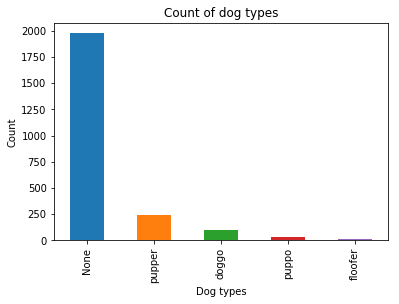

In [41]:
twitter_archive_clean.dog_type.value_counts().plot(kind = 'bar')
plt.xlabel('Dog types')
plt.ylabel('Count')
plt.title('Count of dog types')

### Insight 2: Outlier ranges

Although there is an understanding of the flexibility of the ratings, it is also interesting to know the statistical distribution of the ratings. An interesting observation is noting that anything outside the rating of 15 for the numerator starts being in the outlier category. Perhaps pointing at _overated dogs_ :')

In [42]:
# finding the 1st quartile
q1 = np.percentile(twitter_archive_clean.rating_numerator, 25)
 
# finding the 3rd quartile
q3 = np.percentile(twitter_archive_clean.rating_numerator, 75)
med = np.median(twitter_archive_clean.rating_numerator)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print(iqr, upper_bound, lower_bound)

2.0 15.0 7.0


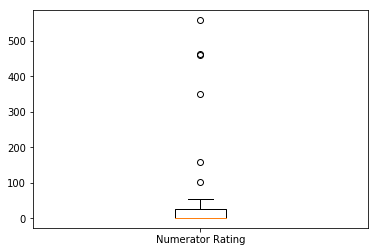

In [43]:
plt.boxplot(twitter_archive_clean.rating_numerator.value_counts())
plt.xticks([1],['Numerator Rating']);

### Insight 3: Tweet traffic

For the aggregated period, it seems the most traffic for the site comes through the last months of the year and January. These are typically festive months.

Text(0.5,1,'Count of tweets grouped by months')

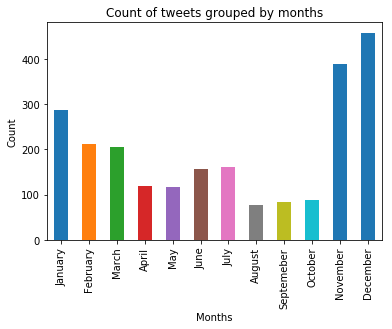

In [44]:
timeGroupedDF=twitter_archive_clean.groupby(twitter_archive_clean.timestamp.dt.month)['timestamp'].count()
timeGroupedDF.plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['January','February','March','April','May','June','July','August','Septemeber','October','November','December']);
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Count of tweets grouped by months')